## A. Regression Infrared Dataset using K-NN and Decision Tree

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Infrared.csv to Infrared.csv


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Baca data
df = pd.read_csv('/content/Infrared.csv')  # Ganti path sesuai lokasi file Anda
df = df.dropna()

# Encode fitur kategori
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])

X = df.drop(columns=['aveOralM'])
y = df['aveOralM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN menggunakan data yang di-scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluasi
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

print("KNN:", evaluate(y_test, y_pred_knn))
print("Decision Tree:", evaluate(y_test, y_pred_dt))


KNN: (0.06874215686274497, np.float64(0.2621872553400431), 0.6544258255298183)
Decision Tree: (0.13117647058823523, np.float64(0.36218292420852094), 0.34056185312962095)


In [5]:
# Drop rows with missing values
df_clean = df.dropna() # Replace df_model with df

# Split data again after cleaning
X = df_clean.drop(columns=['aveOralM'])
y = df_clean['aveOralM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for KNN
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)

# Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Evaluate both models
knn_eval = evaluate(y_test, knn_preds)
dt_eval = evaluate(y_test, dt_preds)

knn_eval, dt_eval

((0.06874215686274497, np.float64(0.2621872553400431), 0.6544258255298183),
 (0.12751225490196072, np.float64(0.35708858130996113), 0.3589822572695913))

In [6]:
# 1. Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv('/content/Infrared.csv')  # Ganti path jika diperlukan

# 3. Cek & Bersihkan Data
df = df.dropna()  # Hapus missing values

# 4. Label Encoding pada Fitur Kategorikal
le = LabelEncoder()
for col in ['Gender', 'Age', 'Ethnicity']:
    df[col] = le.fit_transform(df[col])

# 5. Split Data: Fitur dan Target
X = df.drop(columns=['aveOralM'])
y = df['aveOralM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scaling Data untuk KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Model KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# 8. Model Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 9. Evaluasi Fungsi
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# 10. Tampilkan Hasil Evaluasi
knn_results = evaluate(y_test, y_pred_knn)
dt_results = evaluate(y_test, y_pred_dt)

print(f"KNN - MSE: {knn_results[0]:.4f}, RMSE: {knn_results[1]:.4f}, R2: {knn_results[2]:.4f}")
print(f"Decision Tree - MSE: {dt_results[0]:.4f}, RMSE: {dt_results[1]:.4f}, R2: {dt_results[2]:.4f}")


KNN - MSE: 0.0687, RMSE: 0.2622, R2: 0.6544
Decision Tree - MSE: 0.1275, RMSE: 0.3571, R2: 0.3590


# 📊 Penjelasan Matriks Evaluasi: MSE, RMSE, R²

## 1. Mean Squared Error (MSE)

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Penjelasan:**
- Mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi.
- \( y_i \): Nilai aktual
- \( \hat{y}_i \): Nilai prediksi
- \( n \): Jumlah data
- Semakin kecil MSE, semakin baik model.

---

## 2. Root Mean Squared Error (RMSE)

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{\text{MSE}}
$$

**Penjelasan:**
- RMSE adalah akar dari MSE, sehingga satuannya sama dengan target.
- Lebih mudah dipahami karena tidak dalam bentuk kuadrat.

---

## 3. R-squared (R²)

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

**Penjelasan:**
- Menjelaskan seberapa besar variasi dalam data bisa dijelaskan oleh model.
- \( \bar{y} \): Rata-rata nilai target.
- Nilai R²:
  - 1.0 → model sempurna
  - 0.0 → tidak lebih baik dari tebak rata-rata
  - < 0 → model buruk

---

## 🔎 Perbandingan Singkat

| Matriks | Fungsi | Ideal |
|--------|--------|-------|
| MSE    | Rata-rata kesalahan kuadrat | Kecil |
| RMSE   | Kesalahan dalam satuan asli | Kecil |
| R²     | Variasi yang dijelaskan model | Mendekati 1 |


## B. Income Classification using K-NN and Decision Tree

In [8]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [13]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Mengatur style plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Mengatur opsi tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [14]:
# Load dataset
print("Mengunduh dataset Income...")
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/income.csv"
df = pd.read_csv(url)

# Menampilkan informasi dasar
print(f"Dataset berukuran: {df.shape[0]} baris x {df.shape[1]} kolom")
print("\nLima baris pertama:")
df.head()

Mengunduh dataset Income...
Dataset berukuran: 48842 baris x 15 kolom

Lima baris pertama:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Jumlah nilai yang hilang per kolom:
workclass         963
occupation        966
native-country    274
dtype: int64


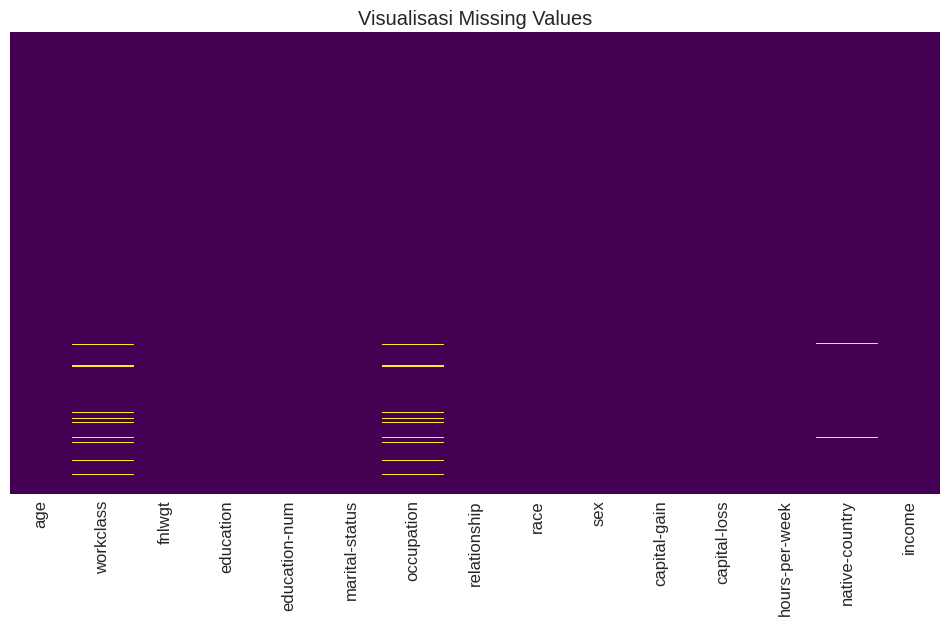

In [15]:
# Memeriksa missing values
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Tidak ada missing values")

# Visualisasi missing values jika ada
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Visualisasi Missing Values')
    plt.show()

In [16]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [17]:
target_column = 'income'
if target_column in df.columns:
    print(f"\nNilai unik pada kolom target '{target_column}':")
    print(df[target_column].unique())
    print(f"\nJumlah kelas dalam target: {df[target_column].nunique()}")
    print("\nDistribusi target:")
    print(df[target_column].value_counts())


Nilai unik pada kolom target 'income':
['<=50K' '>50K' '<=50K.' '>50K.']

Jumlah kelas dalam target: 4

Distribusi target:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


In [18]:
# Identifikasi kolom numerikal dan kategorikal
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Fitur numerikal ({len(numerical_features)}): {numerical_features}")
print(f"Fitur kategorikal ({len(categorical_features)}): {categorical_features}")

Fitur numerikal (6): ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Fitur kategorikal (9): ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [19]:
# Statistik deskriptif untuk kolom numerikal
print("Statistik deskriptif untuk kolom numerikal:")
df[numerical_features].describe()

Statistik deskriptif untuk kolom numerikal:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
# Statistik deskriptif untuk kolom kategorikal
print("Statistik deskriptif untuk kolom kategorikal:")
for column in categorical_features[:5]:  # Batasi hanya 5 kolom kategorikal pertama
    print(f"\n{column}:")
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    stats_df = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages})
    print(stats_df)

Statistik deskriptif untuk kolom kategorikal:

workclass:
                  Count  Percentage (%)
workclass                              
Private           33906       70.816015
Self-emp-not-inc   3862        8.066167
Local-gov          3136        6.549844
State-gov          1981        4.137513
?                  1836        3.834667
Self-emp-inc       1695        3.540174
Federal-gov        1432        2.990873
Without-pay          21        0.043861
Never-worked         10        0.020886

education:
              Count  Percentage (%)
education                          
HS-grad       15784       32.316449
Some-college  10878       22.271815
Bachelors      8025       16.430531
Masters        2657        5.439990
Assoc-voc      2061        4.219729
11th           1812        3.709922
Assoc-acdm     1601        3.277917
10th           1389        2.843864
7th-8th         955        1.955284
Prof-school     834        1.707547
9th             756        1.547848
12th            657   

<ipython-input-21-0f3602b4dfaa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target_column, data=df, palette='Set2')


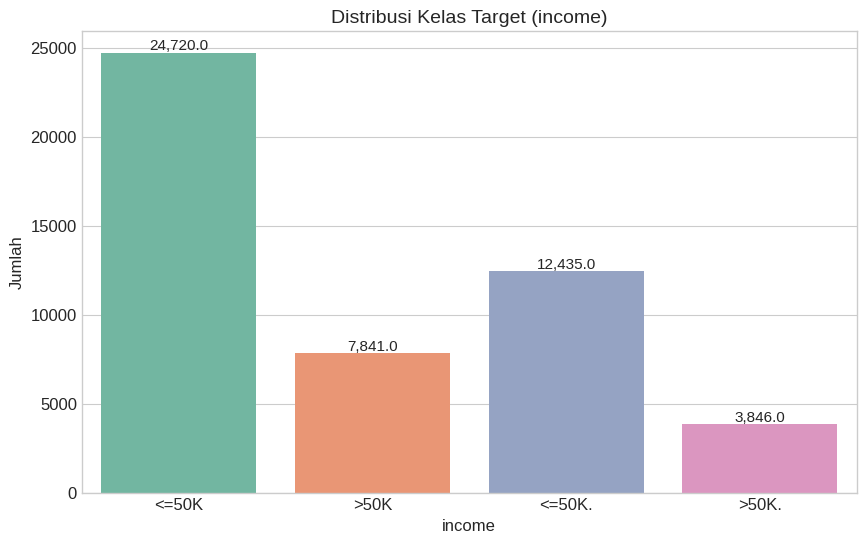

In [21]:
# Visualisasi distribusi target
if target_column in df.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=target_column, data=df, palette='Set2')
    plt.title(f'Distribusi Kelas Target ({target_column})', fontsize=14)
    plt.xlabel(target_column, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)

    # Tambahkan jumlah di atas bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom', fontsize=11)

    plt.show()

In [22]:
if df[target_column].dtype == 'object':
    print("\nMengkonversi kolom target menjadi numerik...")
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[target_column])
    print(f"Pemetaan label: {dict(zip(le.classes_, range(len(le.classes_))))}")
    print("Setelah encoding, distribusi target:")
    print(df[target_column].value_counts())


Mengkonversi kolom target menjadi numerik...
Pemetaan label: {'<=50K': 0, '<=50K.': 1, '>50K': 2, '>50K.': 3}
Setelah encoding, distribusi target:
income
0    24720
1    12435
2     7841
3     3846
Name: count, dtype: int64


In [23]:
# Pisahkan fitur dan target
X = df.drop(columns=[target_column])
y = df[target_column]

# Update kolom numerikal dan kategorikal setelah menghapus target
if target_column in numerical_features:
    numerical_features.remove(target_column)
elif target_column in categorical_features:
    categorical_features.remove(target_column)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data dibagi menjadi {X_train.shape[0]} sampel training dan {X_test.shape[0]} sampel testing.")

Data dibagi menjadi 39073 sampel training dan 9769 sampel testing.


In [24]:
# Transformer untuk fitur numerikal
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Mengisi missing values dengan median
    ('scaler', StandardScaler())  # Standarisasi data
])

# Transformer untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Mengisi missing values dengan nilai terbanyak
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
])

# Gabungkan semua transformers dalam satu preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print(f"Preprocessing pipeline telah dibuat untuk {len(numerical_features)} fitur numerikal dan {len(categorical_features)} fitur kategorikal.")

Preprocessing pipeline telah dibuat untuk 6 fitur numerikal dan 8 fitur kategorikal.


In [25]:
print("="*50)
print("MODEL KLASIFIKASI K-NN")
print("="*50)

# Buat pipeline K-NN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Siapkan parameter grid untuk K-NN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Lakukan grid search dengan validasi silang
# PERBAIKAN: Menggunakan f1_weighted untuk data multiclass
knn_grid = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=5,
    scoring='f1_weighted',  # Menggunakan f1_weighted untuk multiclass
    verbose=1
)

# Latih model
print("\nMelatih model K-NN...")
knn_grid.fit(X_train, y_train)

# Dapatkan model dan parameter terbaik
best_knn = knn_grid.best_estimator_
print(f"\nParameter terbaik K-NN: {knn_grid.best_params_}")


MODEL KLASIFIKASI K-NN

Melatih model K-NN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Parameter terbaik K-NN: {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'uniform'}



Metrik evaluasi K-NN pada data training:
Akurasi: 0.6052
Presisi: 0.5848
Recall: 0.6052
F1-Score: 0.5635


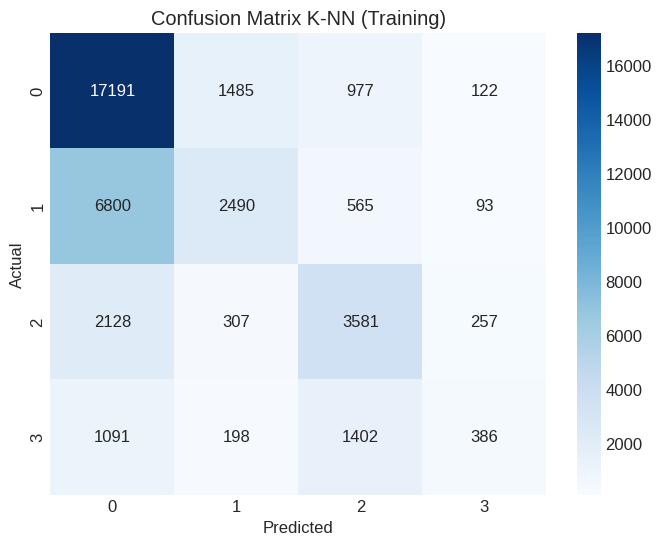


Classification Report (Training):
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     19775
           1       0.56      0.25      0.35      9948
           2       0.55      0.57      0.56      6273
           3       0.45      0.13      0.20      3077

    accuracy                           0.61     39073
   macro avg       0.55      0.45      0.46     39073
weighted avg       0.58      0.61      0.56     39073



In [26]:
# Evaluasi K-NN pada data training
y_train_pred_knn = best_knn.predict(X_train)

# Cek jumlah kelas untuk menentukan cara evaluasi
n_classes = len(np.unique(y))
is_binary = (n_classes == 2)

print("\nMetrik evaluasi K-NN pada data training:")
print(f"Akurasi: {accuracy_score(y_train, y_train_pred_knn):.4f}")
print(f"Presisi: {precision_score(y_train, y_train_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_knn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_knn, average='weighted'):.4f}")

# Tampilkan confusion matrix untuk training set
cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix K-NN (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan classification report untuk training set
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred_knn))


Metrik evaluasi K-NN pada data testing:
Akurasi: 0.5428
Presisi: 0.4932
Recall: 0.5428
F1-Score: 0.4949


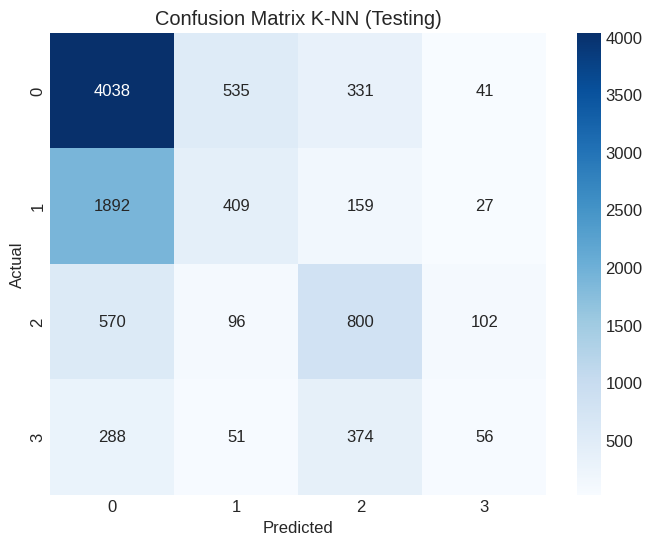


Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.59      0.82      0.69      4945
           1       0.37      0.16      0.23      2487
           2       0.48      0.51      0.50      1568
           3       0.25      0.07      0.11       769

    accuracy                           0.54      9769
   macro avg       0.42      0.39      0.38      9769
weighted avg       0.49      0.54      0.49      9769



In [27]:
# Evaluasi K-NN pada data testing
y_test_pred_knn = best_knn.predict(X_test)

print("\nMetrik evaluasi K-NN pada data testing:")
print(f"Akurasi: {accuracy_score(y_test, y_test_pred_knn):.4f}")
print(f"Presisi: {precision_score(y_test, y_test_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_knn, average='weighted'):.4f}")

# Tampilkan confusion matrix untuk testing set
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix K-NN (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan classification report untuk testing set
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred_knn))

In [28]:
# Hitung dan tampilkan kurva ROC untuk K-NN (jika binary classification)
if is_binary:
    try:
        y_test_prob_knn = best_knn.predict_proba(X_test)[:, 1]
        knn_fpr, knn_tpr, _ = roc_curve(y_test, y_test_prob_knn)
        knn_auc = auc(knn_fpr, knn_tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {knn_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve K-NN')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

        print(f"\nAUC-ROC Score: {knn_auc:.4f}")
    except Exception as e:
        print(f"\nTidak dapat menghitung kurva ROC: {e}")
else:
    print("\nKurva ROC hanya tersedia untuk klasifikasi biner (2 kelas), tetapi target ini memiliki", n_classes, "kelas.")


Kurva ROC hanya tersedia untuk klasifikasi biner (2 kelas), tetapi target ini memiliki 4 kelas.


In [29]:
print("="*50)
print("MODEL KLASIFIKASI K-NN")
print("="*50)

# Buat pipeline K-NN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Siapkan parameter grid untuk K-NN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Lakukan grid search dengan validasi silang
# PERBAIKAN: Menggunakan f1_weighted untuk data multiclass
knn_grid = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=5,
    scoring='f1_weighted',  # Menggunakan f1_weighted untuk multiclass
    verbose=1
)

# Latih model
print("\nMelatih model K-NN...")
knn_grid.fit(X_train, y_train)

# Dapatkan model dan parameter terbaik
best_knn = knn_grid.best_estimator_
print(f"\nParameter terbaik K-NN: {knn_grid.best_params_}")

MODEL KLASIFIKASI K-NN

Melatih model K-NN...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Parameter terbaik K-NN: {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'uniform'}



Metrik evaluasi K-NN pada data training:
Akurasi: 0.6052
Presisi: 0.5848
Recall: 0.6052
F1-Score: 0.5635


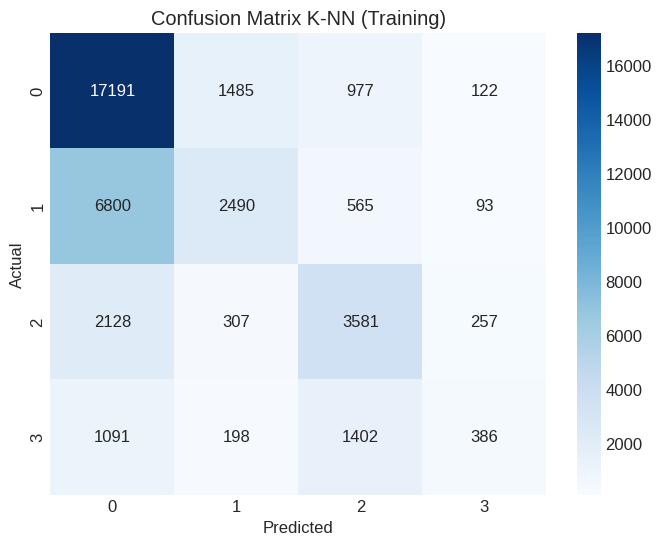


Classification Report (Training):
              precision    recall  f1-score   support

           0       0.63      0.87      0.73     19775
           1       0.56      0.25      0.35      9948
           2       0.55      0.57      0.56      6273
           3       0.45      0.13      0.20      3077

    accuracy                           0.61     39073
   macro avg       0.55      0.45      0.46     39073
weighted avg       0.58      0.61      0.56     39073



In [30]:
# Evaluasi K-NN pada data training
y_train_pred_knn = best_knn.predict(X_train)

# Cek jumlah kelas untuk menentukan cara evaluasi
n_classes = len(np.unique(y))
is_binary = (n_classes == 2)

print("\nMetrik evaluasi K-NN pada data training:")
print(f"Akurasi: {accuracy_score(y_train, y_train_pred_knn):.4f}")
print(f"Presisi: {precision_score(y_train, y_train_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_knn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_knn, average='weighted'):.4f}")

# Tampilkan confusion matrix untuk training set
cm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix K-NN (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan classification report untuk training set
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred_knn))


Metrik evaluasi K-NN pada data testing:
Akurasi: 0.5428
Presisi: 0.4932
Recall: 0.5428
F1-Score: 0.4949


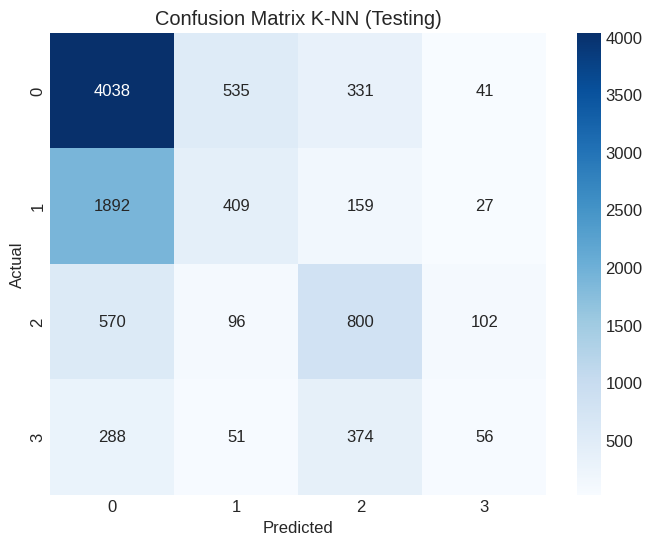


Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.59      0.82      0.69      4945
           1       0.37      0.16      0.23      2487
           2       0.48      0.51      0.50      1568
           3       0.25      0.07      0.11       769

    accuracy                           0.54      9769
   macro avg       0.42      0.39      0.38      9769
weighted avg       0.49      0.54      0.49      9769



In [31]:
# Evaluasi K-NN pada data testing
y_test_pred_knn = best_knn.predict(X_test)

print("\nMetrik evaluasi K-NN pada data testing:")
print(f"Akurasi: {accuracy_score(y_test, y_test_pred_knn):.4f}")
print(f"Presisi: {precision_score(y_test, y_test_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_knn, average='weighted'):.4f}")

# Tampilkan confusion matrix untuk testing set
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix K-NN (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan classification report untuk testing set
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred_knn))

In [32]:
# Hitung dan tampilkan kurva ROC untuk K-NN (jika binary classification)
if is_binary:
    try:
        y_test_prob_knn = best_knn.predict_proba(X_test)[:, 1]
        knn_fpr, knn_tpr, _ = roc_curve(y_test, y_test_prob_knn)
        knn_auc = auc(knn_fpr, knn_tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {knn_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve K-NN')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

        print(f"\nAUC-ROC Score: {knn_auc:.4f}")
    except Exception as e:
        print(f"\nTidak dapat menghitung kurva ROC: {e}")
else:
    print("\nKurva ROC hanya tersedia untuk klasifikasi biner (2 kelas), tetapi target ini memiliki", n_classes, "kelas.")


Kurva ROC hanya tersedia untuk klasifikasi biner (2 kelas), tetapi target ini memiliki 4 kelas.


In [33]:
print("\n" + "="*50)
print("MODEL KLASIFIKASI DECISION TREE")
print("="*50)

# Buat pipeline Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Siapkan parameter grid untuk Decision Tree
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Lakukan grid search dengan validasi silang
# PERBAIKAN: Menggunakan f1_weighted untuk data multiclass
dt_grid = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=5,
    scoring='f1_weighted',  # Menggunakan f1_weighted untuk multiclass
    verbose=1
)

# Latih model
print("\nMelatih model Decision Tree...")
dt_grid.fit(X_train, y_train)

# Dapatkan model dan parameter terbaik
best_dt = dt_grid.best_estimator_
print(f"\nParameter terbaik Decision Tree: {dt_grid.best_params_}")


MODEL KLASIFIKASI DECISION TREE

Melatih model Decision Tree...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Parameter terbaik Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}



Metrik evaluasi Decision Tree pada data training:
Akurasi: 0.6253
Presisi: 0.6401
Recall: 0.6253
F1-Score: 0.5688


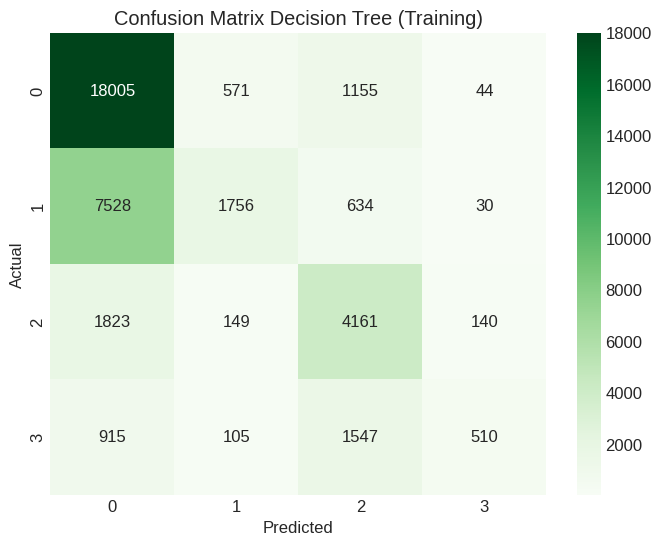


Classification Report (Training):
              precision    recall  f1-score   support

           0       0.64      0.91      0.75     19775
           1       0.68      0.18      0.28      9948
           2       0.56      0.66      0.60      6273
           3       0.70      0.17      0.27      3077

    accuracy                           0.63     39073
   macro avg       0.64      0.48      0.48     39073
weighted avg       0.64      0.63      0.57     39073



In [34]:
# Evaluasi Decision Tree pada data training
y_train_pred_dt = best_dt.predict(X_train)

print("\nMetrik evaluasi Decision Tree pada data training:")
print(f"Akurasi: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Presisi: {precision_score(y_train, y_train_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_dt, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_dt, average='weighted'):.4f}")

# Tampilkan confusion matrix untuk training set
cm_train_dt = confusion_matrix(y_train, y_train_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Decision Tree (Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan classification report untuk training set
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred_dt))


Metrik evaluasi Decision Tree pada data testing:
Akurasi: 0.5648
Presisi: 0.5146
Recall: 0.5648
F1-Score: 0.4999


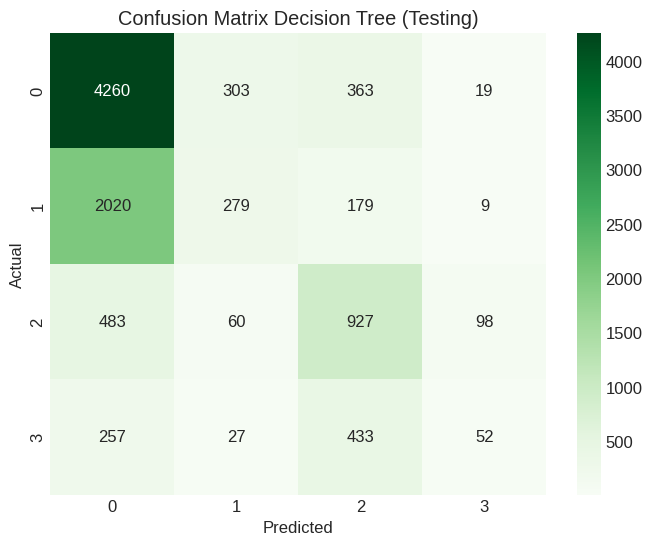


Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.61      0.86      0.71      4945
           1       0.42      0.11      0.18      2487
           2       0.49      0.59      0.53      1568
           3       0.29      0.07      0.11       769

    accuracy                           0.56      9769
   macro avg       0.45      0.41      0.38      9769
weighted avg       0.51      0.56      0.50      9769



In [35]:
# Evaluasi Decision Tree pada data testing
y_test_pred_dt = best_dt.predict(X_test)

print("\nMetrik evaluasi Decision Tree pada data testing:")
print(f"Akurasi: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Presisi: {precision_score(y_test, y_test_pred_dt, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_dt, average='weighted'):.4f}")

# Tampilkan confusion matrix untuk testing set
cm_test_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Decision Tree (Testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan classification report untuk testing set
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred_dt))


In [36]:
# Hitung dan tampilkan kurva ROC untuk Decision Tree (jika binary classification)
if is_binary:
    try:
        y_test_prob_dt = best_dt.predict_proba(X_test)[:, 1]
        dt_fpr, dt_tpr, _ = roc_curve(y_test, y_test_prob_dt)
        dt_auc = auc(dt_fpr, dt_tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(dt_fpr, dt_tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {dt_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve Decision Tree')
        plt.legend(loc="lower right")
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

        print(f"\nAUC-ROC Score: {dt_auc:.4f}")

        # Jika keduanya adalah klasifikasi biner, tampilkan perbandingan ROC
        if 'knn_fpr' in locals() and 'knn_tpr' in locals() and 'knn_auc' in locals():
            plt.figure(figsize=(8, 6))
            plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label=f'K-NN (AUC = {knn_auc:.2f})')
            plt.plot(dt_fpr, dt_tpr, color='green', lw=2, label=f'Decision Tree (AUC = {dt_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Perbandingan Kurva ROC K-NN vs Decision Tree')
            plt.legend(loc="lower right")
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()
    except Exception as e:
        print(f"\nTidak dapat menghitung kurva ROC: {e}")
else:
    print("\nKurva ROC hanya tersedia untuk klasifikasi biner (2 kelas), tetapi target ini memiliki", n_classes, "kelas.")


Kurva ROC hanya tersedia untuk klasifikasi biner (2 kelas), tetapi target ini memiliki 4 kelas.


Tidak dapat memvisualisasikan pohon keputusan: list index out of range


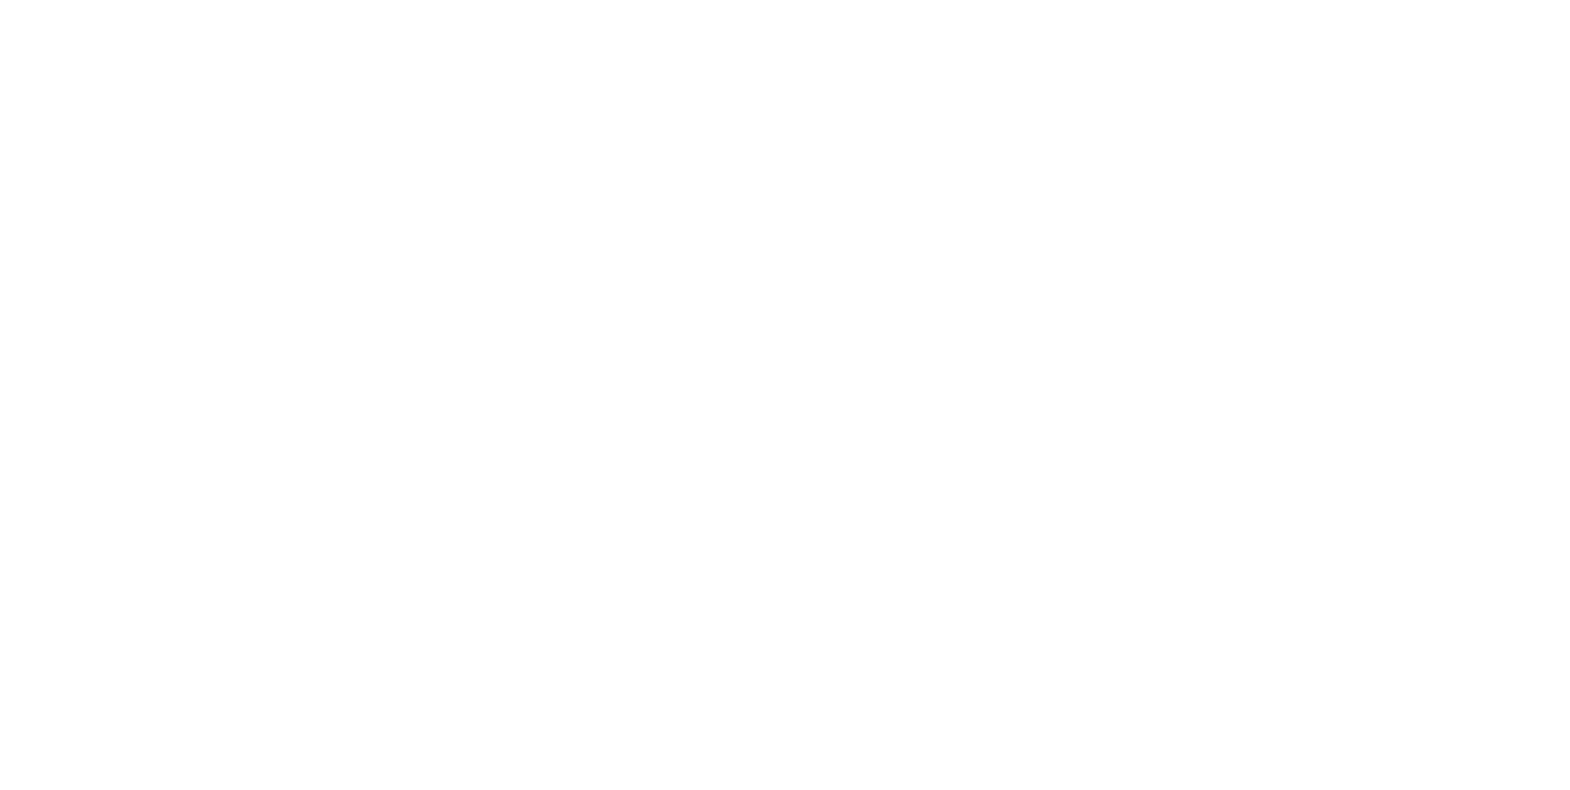

In [37]:
# Visualisasi pohon keputusan (dengan kedalaman terbatas)
try:
    dt_classifier = best_dt.named_steps['classifier']
    max_depth_to_plot = 3  # Batasi kedalaman untuk visualisasi yang lebih jelas

    plt.figure(figsize=(20, 10))
    plot_tree(dt_classifier,
              max_depth=max_depth_to_plot,
              filled=True,
              feature_names=X.columns.tolist(),
              class_names=[str(c) for c in np.unique(y)],
              rounded=True,
              fontsize=10)
    plt.title(f'Visualisasi Decision Tree (max_depth={max_depth_to_plot})', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Tampilkan feature importance jika tersedia
    if hasattr(dt_classifier, 'feature_importances_'):
        feature_importances = dt_classifier.feature_importances_
        feature_names = X.columns.tolist()

        # Buat dataframe untuk feature importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        }).sort_values('Importance', ascending=False)

        # Tampilkan top 10 feature importance
        top_n = min(10, len(importance_df))
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n))
        plt.title(f'Top {top_n} Feature Importance - Decision Tree', fontsize=14)
        plt.xlabel('Importance', fontsize=12)
        plt.tight_layout()
        plt.show()

        print("\nFeature Importance:")
        print(importance_df.head(top_n))
except Exception as e:
    print(f"Tidak dapat memvisualisasikan pohon keputusan: {e}")


PERBANDINGAN MODEL

Perbandingan metrik evaluasi pada testing set:
               K-NN  Decision Tree
Accuracy   0.542840       0.564848
Precision  0.493232       0.514572
Recall     0.542840       0.564848
F1-Score   0.494942       0.499863


<Figure size 1200x600 with 0 Axes>

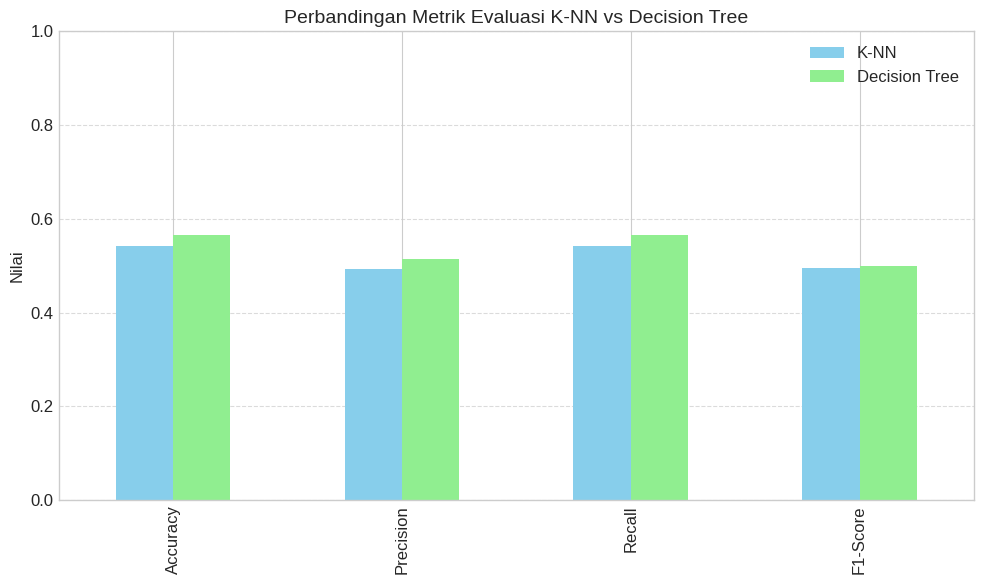


Berdasarkan F1-Score, model Decision Tree lebih baik pada dataset ini.


In [38]:
print("\n" + "="*50)
print("PERBANDINGAN MODEL")
print("="*50)

# Metrik untuk K-NN (testing)
knn_accuracy = accuracy_score(y_test, y_test_pred_knn)
knn_precision = precision_score(y_test, y_test_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_test_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_test_pred_knn, average='weighted')

# Metrik untuk Decision Tree (testing)
dt_accuracy = accuracy_score(y_test, y_test_pred_dt)
dt_precision = precision_score(y_test, y_test_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_test_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_test_pred_dt, average='weighted')

# AUC-ROC jika tersedia
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
comparison_data = {
    'K-NN': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1]
}

# Tambahkan AUC-ROC jika klasifikasi biner
if is_binary and 'knn_auc' in locals() and 'dt_auc' in locals():
    metrics.append('AUC-ROC')
    comparison_data['K-NN'].append(knn_auc)
    comparison_data['Decision Tree'].append(dt_auc)

comparison_df = pd.DataFrame(comparison_data, index=metrics)
print("\nPerbandingan metrik evaluasi pada testing set:")
print(comparison_df)

# Visualisasi perbandingan metrik evaluasi
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Perbandingan Metrik Evaluasi K-NN vs Decision Tree', fontsize=14)
plt.ylabel('Nilai', fontsize=12)
plt.ylim([0, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Tentukan model terbaik berdasarkan F1-Score
if knn_f1 > dt_f1:
    print("\nBerdasarkan F1-Score, model K-NN lebih baik pada dataset ini.")
elif dt_f1 > knn_f1:
    print("\nBerdasarkan F1-Score, model Decision Tree lebih baik pada dataset ini.")
else:
    print("\nBerdasarkan F1-Score, kedua model memiliki performa yang sama pada dataset ini.")

In [39]:
print("="*50)
print("KESIMPULAN DAN REKOMENDASI")
print("="*50)

# Tentukan model terbaik
best_model = "K-NN" if knn_f1 > dt_f1 else "Decision Tree" if dt_f1 > knn_f1 else "Keduanya"
best_f1 = max(knn_f1, dt_f1)

conclusion = f"""
Berdasarkan analisis yang telah dilakukan pada dataset income, dapat disimpulkan bahwa:

1. Model terbaik untuk klasifikasi income adalah {best_model} dengan F1-Score {best_f1:.4f} pada data testing.

2. Kedua model telah diimplementasikan dengan tuning hyperparameter melalui GridSearchCV:
   - K-NN optimal: {knn_grid.best_params_}
   - Decision Tree optimal: {dt_grid.best_params_}

3. Untuk masalah klasifikasi income ini, F1-Score weighted merupakan metrik evaluasi yang lebih informatif karena:
   - Menyeimbangkan presisi dan recall untuk setiap kelas
   - Memberikan bobot berdasarkan frekuensi kelas
   - Cocok untuk dataset yang mungkin tidak seimbang

4. Preprocessing data sangat penting untuk performa model, termasuk:
   - Imputasi missing values dengan nilai median (numerikal) dan modus (kategorikal)
   - Standardisasi fitur numerikal untuk K-NN
   - One-hot encoding untuk fitur kategorikal
5. Keuntungan dan keterbatasan model terpilih:
"""

if best_model == "K-NN":
    conclusion += """
   - Keuntungan K-NN: Sederhana, tidak membutuhkan asumsi distribusi data, bekerja baik untuk decision boundary yang kompleks
   - Keterbatasan K-NN: Komputasi prediksi lebih berat, sensitivitas terhadap fitur tidak relevan, membutuhkan standardisasi fitur
"""
elif best_model == "Decision Tree":
    conclusion += """
   - Keuntungan Decision Tree: Interpretabilitas tinggi, dapat menangani fitur campuran, mampu mengidentifikasi fitur penting
   - Keterbatasan Decision Tree: Cenderung overfitting jika tidak dibatasi, tidak stabil terhadap variasi kecil pada data
"""
else:
    conclusion += """
   - Kedua model memiliki performa yang sebanding pada dataset ini
   - K-NN lebih sederhana tetapi kurang interpretable
   - Decision Tree lebih interpretable tetapi bisa overfitting
"""

conclusion += """

Rekomendasi:

1. Pertimbangkan model ensemble seperti Random Forest atau Gradient Boosting untuk meningkatkan performa.

2. Lakukan feature engineering untuk mengekstrak informasi lebih dari data yang ada.

3. Jika klasifikasi ini untuk aplikasi produksi, Decision Tree mungkin lebih disukai karena interpretabilitas dan kecepatan prediksi.

4. Jika akurasi prediksi sangat penting dan interpretabilitas kurang kritis, K-NN atau model lain seperti SVM atau Neural Network bisa dipertimbangkan.

5. Untuk meningkatkan keseimbangan kelas, teknik resampling seperti SMOTE bisa diterapkan jika kelas target sangat tidak seimbang.
"""

print(conclusion)

KESIMPULAN DAN REKOMENDASI

Berdasarkan analisis yang telah dilakukan pada dataset income, dapat disimpulkan bahwa:

1. Model terbaik untuk klasifikasi income adalah Decision Tree dengan F1-Score 0.4999 pada data testing.

2. Kedua model telah diimplementasikan dengan tuning hyperparameter melalui GridSearchCV:
   - K-NN optimal: {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'uniform'}
   - Decision Tree optimal: {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}

3. Untuk masalah klasifikasi income ini, F1-Score weighted merupakan metrik evaluasi yang lebih informatif karena:
   - Menyeimbangkan presisi dan recall untuk setiap kelas
   - Memberikan bobot berdasarkan frekuensi kelas
   - Cocok untuk dataset yang mungkin tidak seimbang

4. Preprocessing data sangat penting untuk performa model, termasuk:
   - Imputasi missing values dengan nilai median (numerikal) dan modus (

### Penjelasan K-NN Classification

K-Nearest Neighbors (K-NN) adalah algoritma klasifikasi non-parametrik di mana objek diklasifikasikan berdasarkan voting mayoritas dari tetangga terdekatnya. Formula keputusan dalam K-NN adalah:

$$\hat{y} = \text{modus}\{y_i | x_i \in N_k(x)\}$$

Dimana:
- $\hat{y}$ adalah kelas yang diprediksi
- $N_k(x)$ adalah himpunan $k$ tetangga terdekat dari titik query $x$
- $y_i$ adalah label kelas tetangga ke-$i$

Jarak biasanya dihitung menggunakan jarak Euclidean (untuk $p=2$):

$$d(x, x') = \sqrt{\sum_{j=1}^{p} (x_j - x'_j)^2}$$

Atau jarak Manhattan ($p=1$):

$$d(x, x') = \sum_{j=1}^{p} |x_j - x'_j|$$

Untuk K-NN berbobot, kontribusi setiap tetangga diberi bobot berdasarkan jarak:

$$w_i = \frac{1}{d(x, x_i)^2}$$

Model Klasifikasi Decision Tree

### Penjelasan Decision Tree Classification

Decision Tree adalah model prediktif yang mempartisi ruang fitur menjadi himpunan bagian berdasarkan aturan keputusan. Algoritma ini bekerja dengan memilih fitur dan split point yang meminimalkan impuritas di setiap node.

Untuk klasifikasi, impuritas diukur menggunakan Gini Index atau Entropy:

Gini Index:
$$Gini(D) = 1 - \sum_{i=1}^{c} p_i^2$$

Entropy:
$$Entropy(D) = -\sum_{i=1}^{c} p_i \log_2(p_i)$$

Dimana:
- $c$ adalah jumlah kelas
- $p_i$ adalah proporsi sampel dalam kelas $i$

Information Gain mengukur pengurangan impuritas setelah split:

$$Gain(D, a) = Impurity(D) - \sum_{v \in Values(a)} \frac{|D_v|}{|D|} Impurity(D_v)$$

Dimana:
- $D$ adalah dataset
- $a$ adalah atribut yang digunakan untuk split
- $D_v$ adalah subset sampel di mana atribut $a$ memiliki nilai $v$

Penjelasan Metrik Evaluasi

### Akurasi (Accuracy)

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

**Kelebihan:**
- Mudah diinterpretasi, mengukur proporsi prediksi yang benar dari total data
- Intuitive dan umum digunakan

**Keterbatasan:**
- Kurang informatif untuk dataset yang tidak seimbang (imbalanced)
- Bisa menyesatkan jika kelas mayoritas mendominasi

### Presisi (Precision)

$Precision = \frac{TP}{TP + FP}$

**Kelebihan:**
- Fokus pada minimalisasi False Positive
- Penting ketika cost False Positive tinggi (mis: filtering spam)

**Keterbatasan:**
- Tidak memperhatikan False Negative
- Bisa menghasilkan model yang sangat konservatif

### Recall (Sensitivity)

$Recall = \frac{TP}{TP + FN}$

**Kelebihan:**
- Fokus pada minimalisasi False Negative
- Penting ketika cost False Negative tinggi (mis: deteksi penyakit)

**Keterbatasan:**
- Tidak memperhatikan False Positive
- Bisa menghasilkan model yang terlalu liberal dalam prediksi positif

### F1-Score

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

**Kelebihan:**
- Menyeimbangkan presisi dan recall
- Baik untuk dataset tidak seimbang
- Memberikan metrik tunggal yang mempertimbangkan kedua aspek

**Keterbatasan:**
- Tidak mempertimbangkan True Negative
- Memberikan bobot yang sama untuk presisi dan recall

### AUC-ROC (Area Under the Receiver Operating Characteristic Curve)

ROC Curve dibuat dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR):

$TPR = \frac{TP}{TP + FN} = Recall$

$FPR = \frac{FP}{FP + TN}$

**Kelebihan:**
- Mengukur kemampuan model dalam membedakan kelas pada berbagai threshold
- Tidak terpengaruh oleh ketidakseimbangan kelas
- Memberikan gambaran komprehensif tentang performa model

**Keterbatasan:**
- Kurang intuitif untuk diinterpretasikan
- Hanya berlaku untuk klasifikasi biner
- Bisa memberikan gambaran yang optimis untuk dataset sangat tidak seimbang

### Metrik Evaluasi Terbaik untuk Klasifikasi Income

Untuk masalah klasifikasi income, **F1-Score weighted** dianggap sebagai metrik evaluasi yang lebih baik karena:

1. Menyeimbangkan presisi dan recall untuk setiap kelas
2. Memberikan bobot pada setiap kelas berdasarkan frekuensinya
3. Cocok untuk dataset yang mungkin tidak seimbang

Untuk kasus klasifikasi biner, **AUC-ROC** juga sangat informatif karena menunjukkan kemampuan model untuk membedakan kelas pada berbagai threshold keputusan.

Pemilihan metrik terbaik harus mempertimbangkan konteks bisnis:
- Jika False Positive dan False Negative memiliki konsekuensi yang sama, Akurasi bisa menjadi pilihan
- Jika False Positive lebih bermasalah, fokus pada Presisi
- Jika False Negative lebih bermasalah, fokus pada Recall
- Jika keduanya penting, F1-Score lebih baik

Penjelasan Lebih Lanjut tentang Algoritma

### K-Nearest Neighbors (K-NN)

K-NN adalah algoritma berbasis instans (instance-based) yang mengklasifikasikan instans baru berdasarkan "voting mayoritas" dari k tetangga terdekat. Jarak antar instans dihitung menggunakan metrik jarak seperti Euclidean atau Manhattan.

**Proses klasifikasi K-NN:**
1. Hitung jarak antara instans yang akan diprediksi dengan semua instans training
2. Pilih k instans terdekat
3. Ambil kelas mayoritas dari k instans tersebut sebagai hasil prediksi

**Parameter penting dalam K-NN:**
- **n_neighbors (k)**: Jumlah tetangga yang dipertimbangkan untuk voting
  - k kecil: model lebih sensitif terhadap noise, cenderung overfitting
  - k besar: model lebih stabil tetapi bias terhadap kelas mayoritas
- **weights**: Metode pembobotan untuk voting
  - uniform: semua tetangga memiliki bobot yang sama
  - distance: tetangga yang lebih dekat memiliki bobot lebih besar
- **p**: Parameter jarak Minkowski
  - p=1: jarak Manhattan (L1 norm)
  - p=2: jarak Euclidean (L2 norm)

### Decision Tree

Decision Tree adalah model yang mempartisi ruang fitur secara rekursif berdasarkan aturan keputusan untuk membentuk struktur pohon. Pada setiap node, algoritma memilih fitur dan threshold yang memaksimalkan information gain.

**Proses pembentukan Decision Tree:**
1. Temukan fitur dan threshold yang memberikan information gain tertinggi
2. Bagi data menjadi subset berdasarkan fitur dan threshold tersebut
3. Ulangi proses secara rekursif untuk setiap subset
4. Hentikan ketika kriteria penghentian terpenuhi (mis: kedalaman maksimum, jumlah sampel minimum)

**Parameter penting dalam Decision Tree:**
- **criterion**: Fungsi untuk mengukur kualitas split
  - gini: Gini impurity
  - entropy: Information gain berdasarkan entropy
- **max_depth**: Kedalaman maksimum pohon
  - None: pohon tumbuh tanpa batasan kedalaman
  - Nilai numerik: membatasi kedalaman, mencegah overfitting
- **min_samples_split**: Jumlah sampel minimum yang dibutuhkan untuk membagi node internal
- **min_samples_leaf**: Jumlah sampel minimum yang dibutuhkan di node daun

### Perbedaan Utama K-NN dan Decision Tree

| Aspek | K-NN | Decision Tree |
|-------|------|---------------|
| Pendekatan | Lazy learning, tidak ada fase training | Eager learning, membangun model eksplisit |
| Waktu Komputasi | Cepat saat training, lambat saat prediksi | Lambat saat training, cepat saat prediksi |
| Interpretabilitas | Sulit diinterpretasi (black box) | Mudah diinterpretasi (white box) |
| Sensitivitas Skala | Sensitif terhadap skala fitur | Tidak sensitif terhadap skala fitur |
| Dimensionalitas | Buruk untuk dimensi tinggi | Relatif baik untuk dimensi tinggi |
| Kecenderungan Overfitting | Overfitting saat k kecil | Overfitting saat pohon terlalu dalam |